# Project: Mobile Price Classification


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#datasplit">Data Split</a></li>
<li><a href="#datascaling">Data Scaling</a></li>
<li><a href="#MS">Model Selection</a></li>
<li><a href="#BM">Base Model</a></li>
<li><a href="#HPT">Hyper paramter tuning</a></li>
<li><a href="#finalmodel">Final Model</a></li>
</ul>

<a id='intro'></a>
## Introduction

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

- 'battery_power' Total energy a battery can store in one time measured in mAh.
- 'blue' Has bluetooth or not.
- 'clock_speed' speed at which microprocessor executes instructions.
- 'dual_sim' Has dual sim support or not.
- 'fc' Front Camera mega pixels.
- 'four_g' Has 4G or not.
- 'int_memory' Internal Memory in Gigabytes.
- 'm_dep' Mobile Depth in cm.
- 'mobile_wt' Weight of mobile phone.
- ‘n_cores’ Number of cores of processor.
- ‘pc’ Primary Camera mega pixels.
- ‘px_height’ Pixel Resolution Height.
- ‘px_width’ Pixel Resolution Width.
- ‘ram’ Random Access Memory in Mega Bytes.
- ‘sc_h’ Screen Height of mobile in cm.
- ‘sc_w’ Screen Width of mobile in cm.
- ‘talk_time’ longest time that a single battery charge will last when you are.
- ‘three_g’ Has 3G or not.
- ‘touch_screen’ Has touch screen or not.
- ‘wifi’ Has wifi or not.
- ‘price_range’ This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,r2_score,make_scorer
sns.set(rc={'figure.figsize': [12, 12]}, font_scale=1.2)

<a id='wrangling'></a>
## Data Wrangling

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# boolean 
"""
blue
dual_sim
four_g
three_g
touch_screen
wifi
"""

# integer
"""
battery_power
fc
int_memory
pc
mobile_wt
n_cores
px_height
px_width
ram
sc_h
sc_w
talk_time
"""

# float
"""
clock_speed
m_dep
"""


In [6]:
train_data["blue"].unique()

array([0, 1], dtype=int64)

In [7]:
train_data.shape

(2000, 21)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [10]:
train_data.duplicated().sum()

0

In [11]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
train_data.groupby(["price_range"]).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


In [13]:
# Unique Values in each column
train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

#### CORRELATION BETWEEN FEATURES


Following heatmap shows correlation values between features.

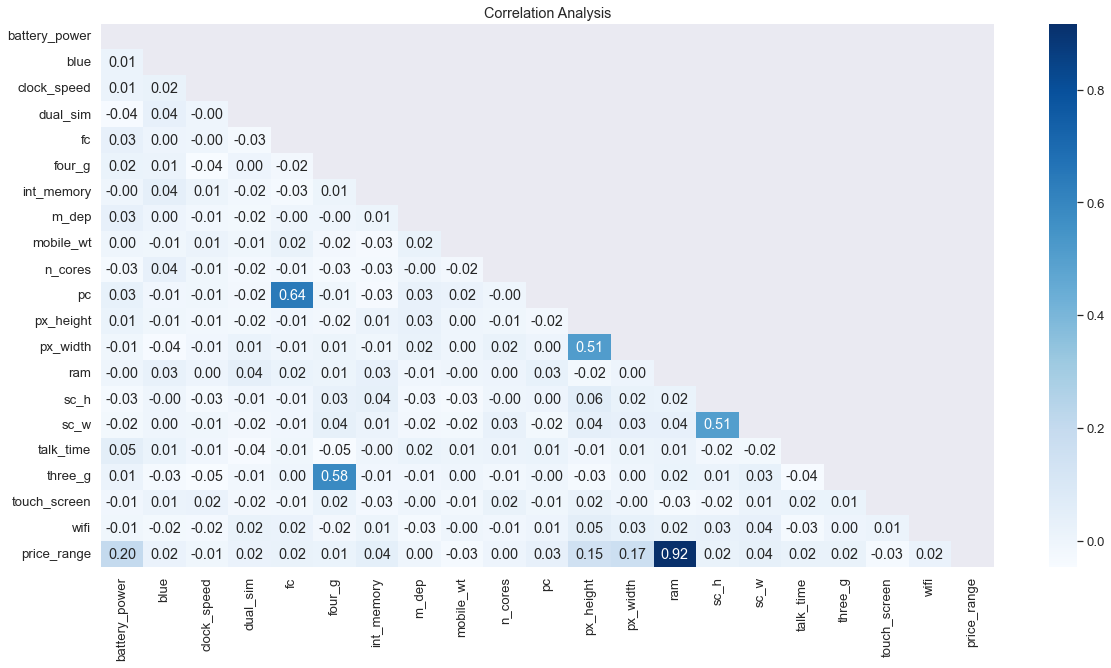

In [14]:
# correlation matrix and heatmap to stand on important features
corr_matrix = train_data.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'Blues', mask = mask, annot = True)
plt.title("Correlation Analysis");

As we can see our target price range has highly positive correlation between ram.

Also:

- 3G and 4G
- pc(Primary Camera mega pixels) and fc(Front Camera mega pixels).
- px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height).
- sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm).

features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

#### 1- PRICE RANGE AND RAM

<AxesSubplot:xlabel='ram', ylabel='Count'>

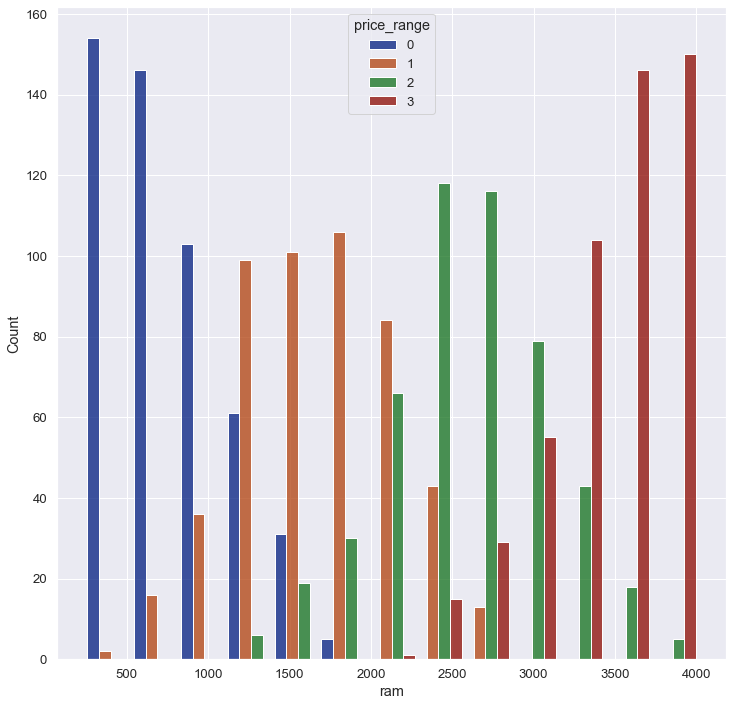

In [15]:
sns.histplot(data=train_data,x="ram",hue="price_range",multiple="dodge",palette="dark")

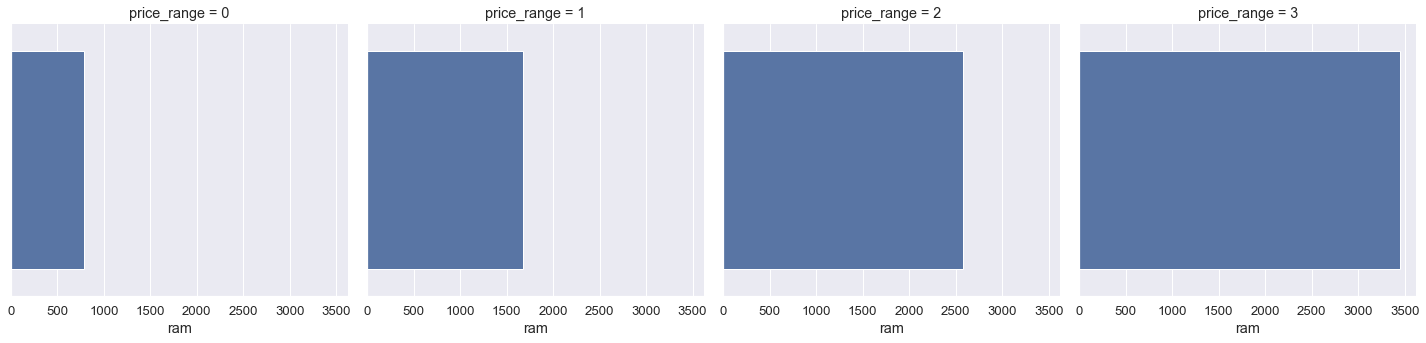

In [16]:
sns.catplot(data=train_data, x='ram', col='price_range', kind='bar',col_wrap=4,ci=None)

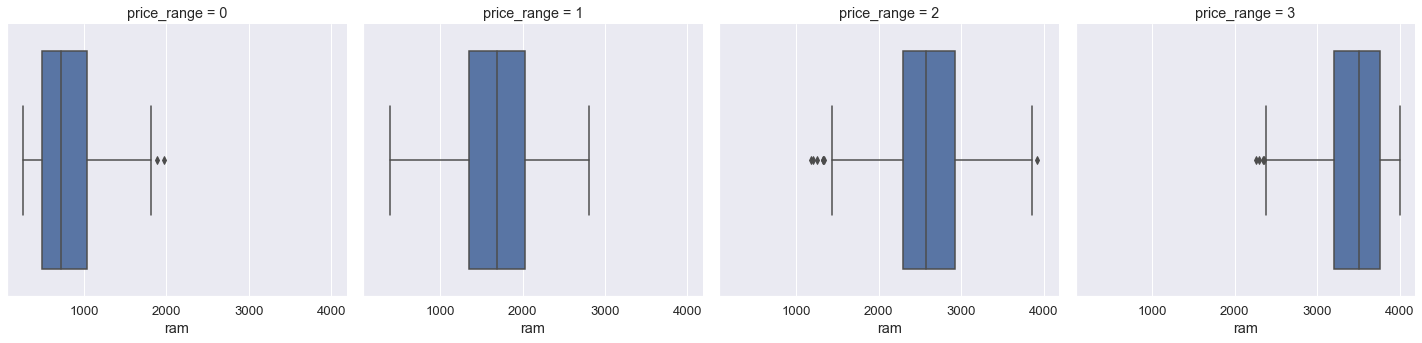

In [17]:
sns.catplot(data=train_data, x='ram', col='price_range', kind='box',col_wrap=4,ci=None)

#### 2- BATTERY POWER- RAM AND PRICE RANGE

<AxesSubplot:xlabel='ram', ylabel='battery_power'>

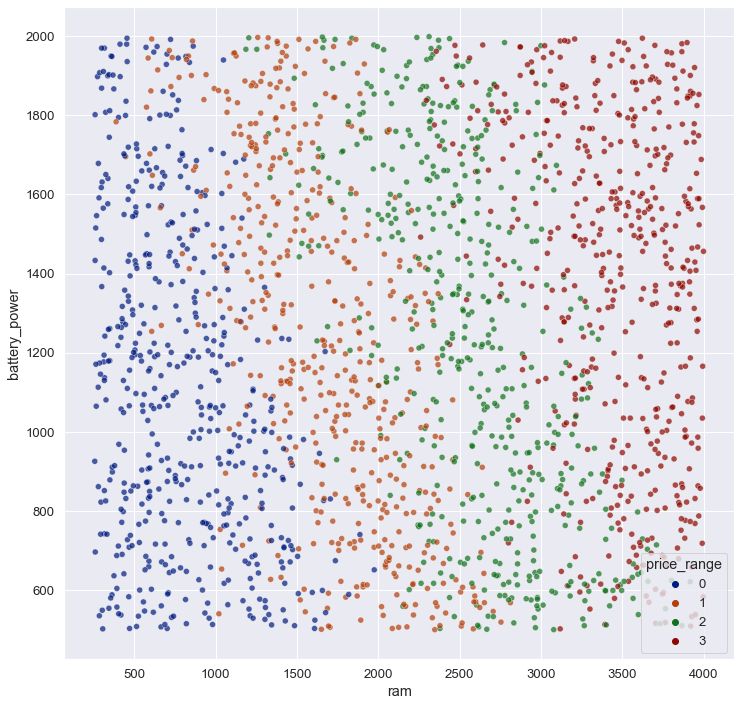

In [18]:
sns.scatterplot(data=train_data, y="battery_power",x='ram',hue="price_range",alpha=0.7,palette="dark")

#### 3- INTERNAL MEMORY IN GIGABYTE - RAM AND PRICE RANGE

<AxesSubplot:xlabel='ram', ylabel='int_memory'>

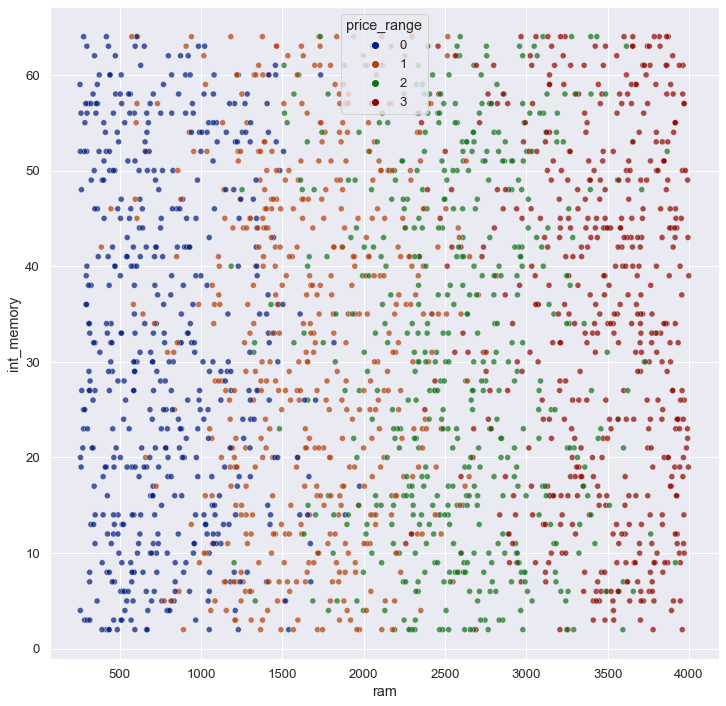

In [19]:
sns.scatterplot(data=train_data, y="int_memory",x='ram',hue="price_range",alpha=0.7,palette="dark")

#### 4- TOUCH SCREEN- PRICE RANGE

Following scatter stripplot shows touch screen or not and ram values according to price range.

0= not touch screen

1= has touch screen

In [20]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

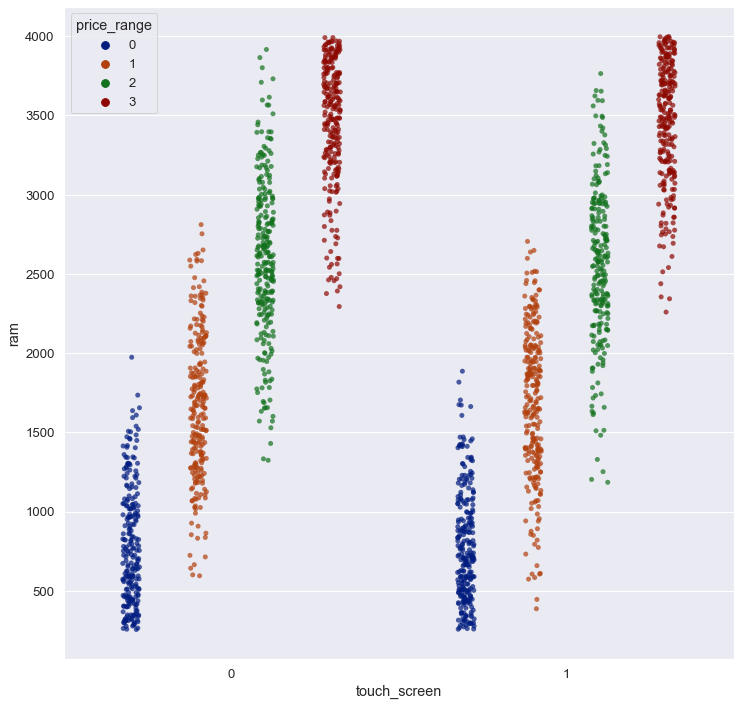

In [21]:
sns.stripplot(data=train_data, x="touch_screen",y='ram',hue="price_range",alpha=0.7,palette="dark",dodge=True)

#### 5- 3G-RAM and Price Range

Following boxplots show 3G or not and ram values according to price range.

0= not 3G

1= has 3G

<AxesSubplot:xlabel='three_g', ylabel='ram'>

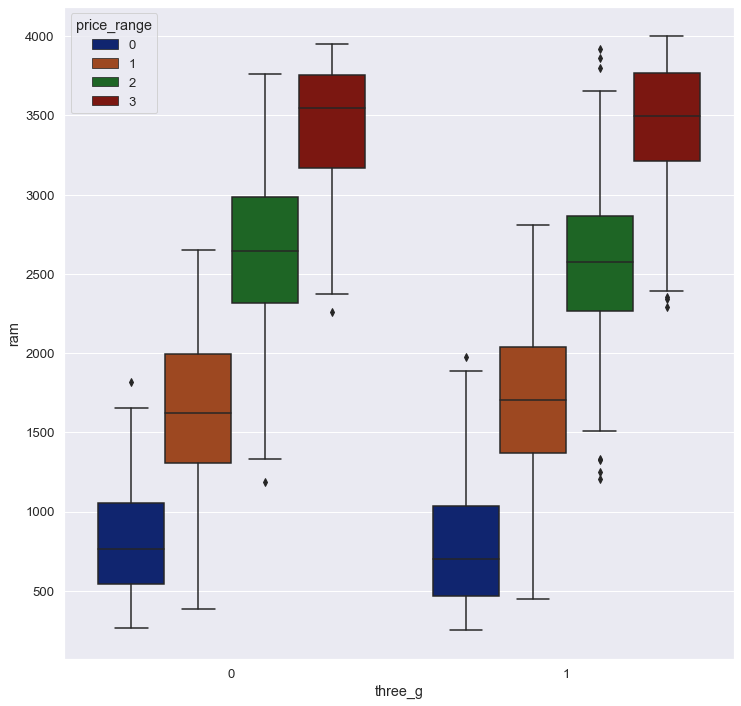

In [22]:
sns.boxplot(data=train_data, x="three_g",y='ram',hue="price_range",palette="dark",dodge=True)

#### 6- 4G-RAM- PRICE RANGE

Following boxplots show 4G or not and ram values according to price range.

0= not 4G

1= has 4G

<AxesSubplot:xlabel='four_g', ylabel='ram'>

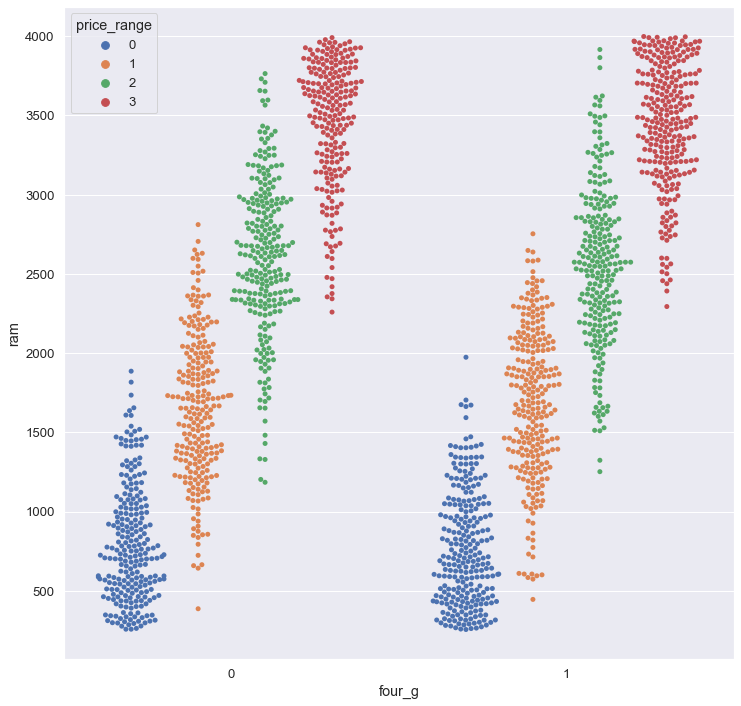

In [23]:
sns.swarmplot(data=train_data, y="ram",hue="price_range",x="four_g",dodge=True)

#### 8- Primary Camera mega pixels(pc) - RAM and Price Range

Following scatter plot shows primary camera mp values and ram values according to price range.

<AxesSubplot:xlabel='ram', ylabel='pc'>

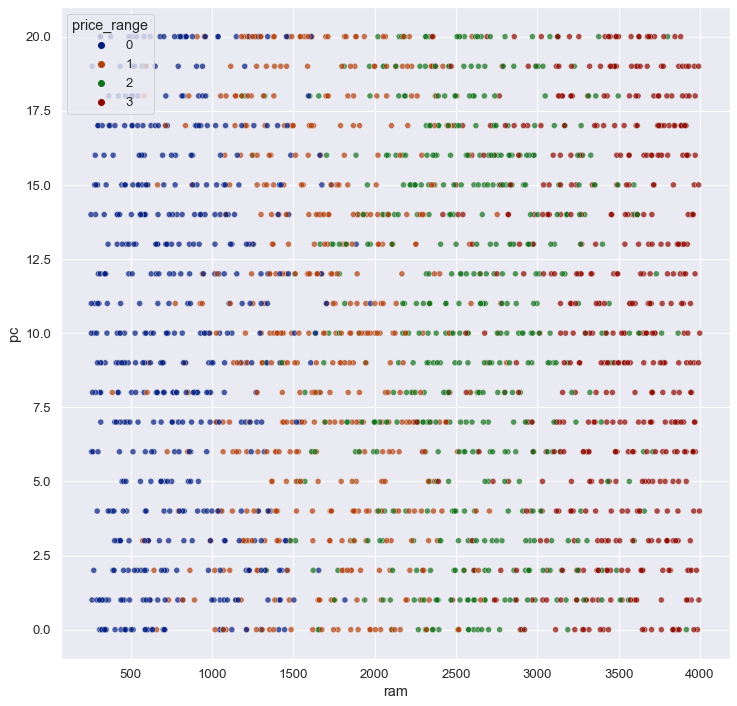

In [24]:
sns.scatterplot(data=train_data,x="ram",hue="price_range",y="pc",palette="dark",alpha=0.7)

Following violin plot shows primary camera mp values according to price range.

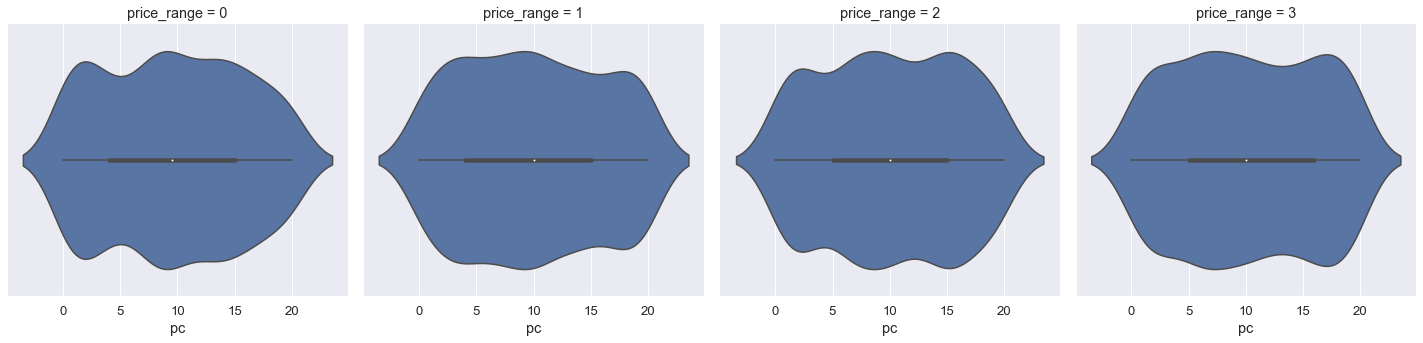

In [25]:
sns.catplot(data=train_data, col="price_range",x="pc",kind="violin")

#### 9- Front Camera mega pixels(fc) - RAM and Price Range

Following violin plot shows secondary camera mp values according to price range.

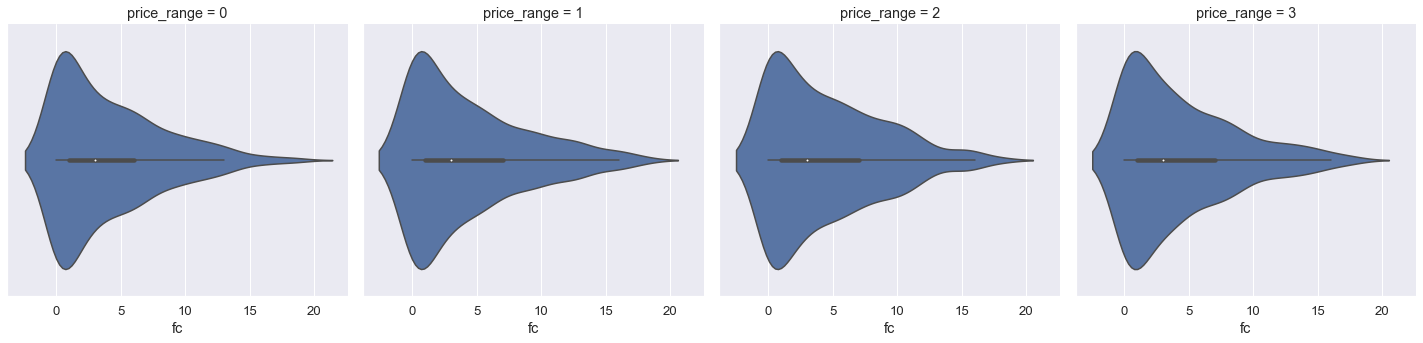

In [26]:
sns.catplot(data=train_data, col="price_range",x="fc",kind="violin")

#### 10- Weight of mobile phone(mobile_wt)- RAM and Price Range

Following scatter plots show weight of mobile phone and ram values according to price range

In [27]:
class_0 = train_data[train_data["price_range"] == 0]
class_1 = train_data[train_data["price_range"] == 1]
class_2 = train_data[train_data["price_range"] == 2]
class_3 = train_data[train_data["price_range"] == 3]

<AxesSubplot:title={'center':'class 3'}, xlabel='ram', ylabel='mobile_wt'>

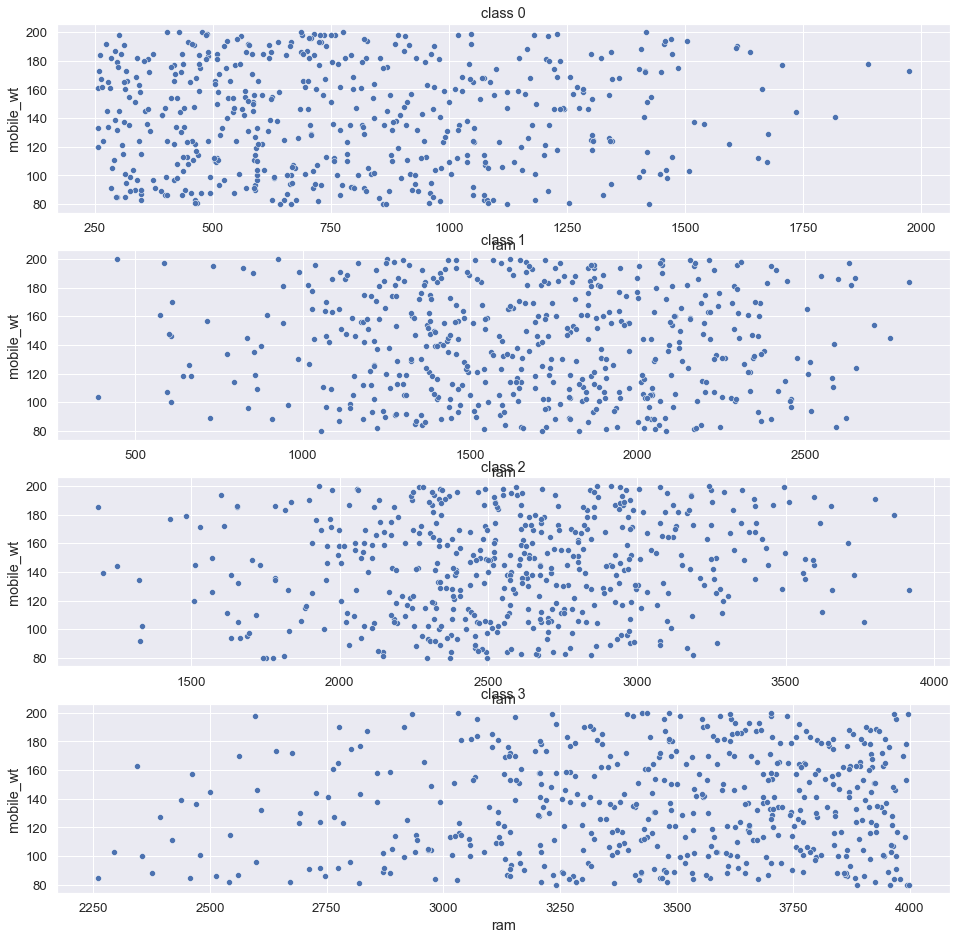

In [28]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(16,16))

ax1.set_title('class 0')
sns.scatterplot(x='ram', y='mobile_wt', data=class_0, ax=ax1)

ax2.set_title('class 1')
sns.scatterplot(x='ram', y='mobile_wt', data=class_1, ax=ax2)

ax3.set_title('class 2')
sns.scatterplot(x='ram', y='mobile_wt', data=class_2, ax=ax3)

ax4.set_title('class 3')
sns.scatterplot(x='ram', y='mobile_wt', data=class_3, ax=ax4)


Following violin plots show weight of mobile phone according to price range

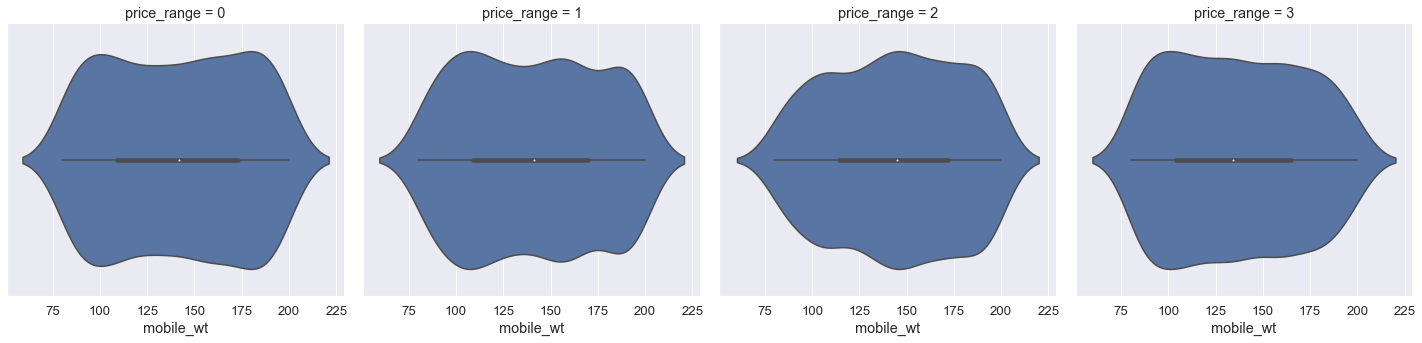

In [29]:
sns.catplot(data=train_data, col="price_range",x="mobile_wt",kind="violin")

#### 14- DUAL SIM- RAM AND PRICE RANGE

Following distibution plots show dual sim or not and ram values according to price range.

0- has not dual

1- has wifi

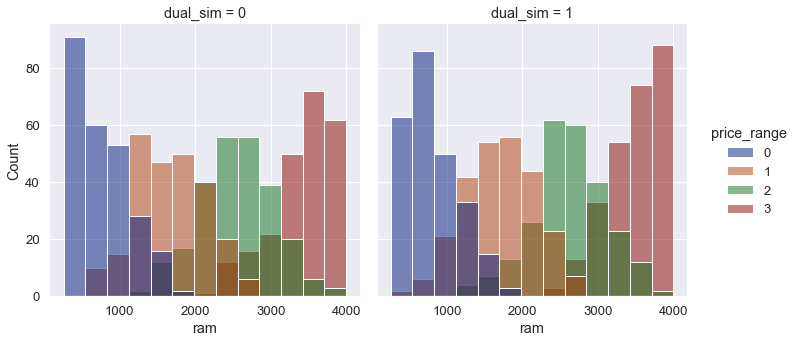

In [30]:
sns.displot(data= train_data,col="dual_sim",hue="price_range",x="ram",palette="dark")

#### 15- Screen Height of mobile(sc_h) - Price Range

Following scatter plots show screen height of mobile in cm and ram values according to price range.

<AxesSubplot:xlabel='ram', ylabel='sc_h'>

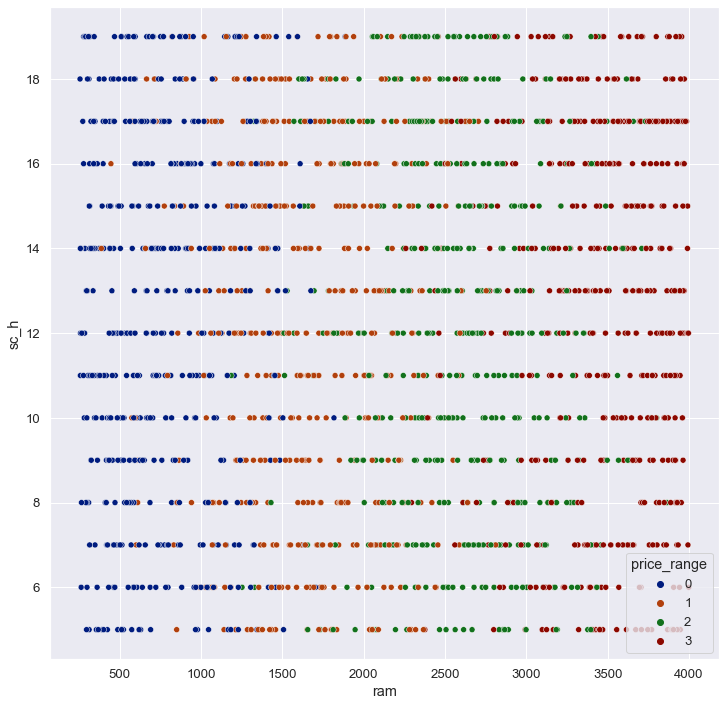

In [31]:
sns.scatterplot(data=train_data, y="sc_h",x="ram",hue="price_range",palette="dark")

#### 16- Screen Width of mobile(sc_w)- Price Range

Following scatter plot show screen width of mobile in cm and ram values according to price range.

<AxesSubplot:xlabel='ram', ylabel='sc_w'>

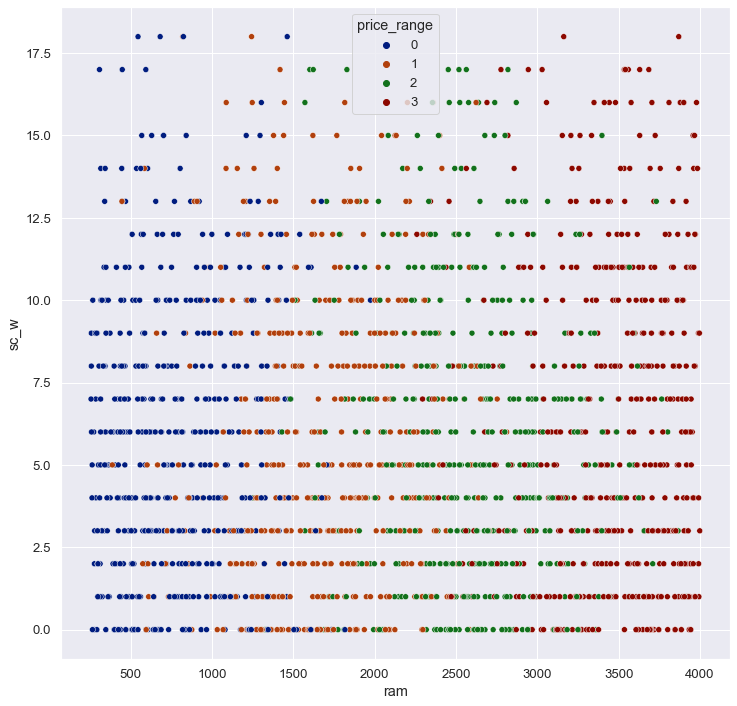

In [32]:
sns.scatterplot(data=train_data, y="sc_w",x="ram",hue="price_range",palette="dark")

In [35]:
def plot_features_for_each_class(column_name):
    plt.figure()
    sns.displot(data= train_data, x= column_name, hue="price_range", multiple="stack")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f'Distribution Of {column_name}')
    plt.show()

<Figure size 864x864 with 0 Axes>

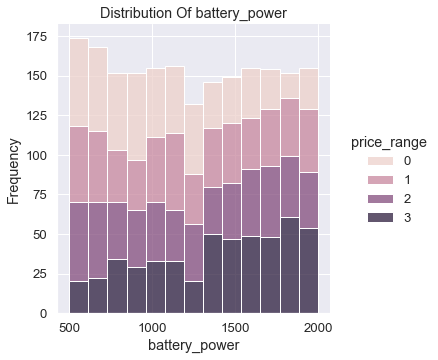

<Figure size 864x864 with 0 Axes>

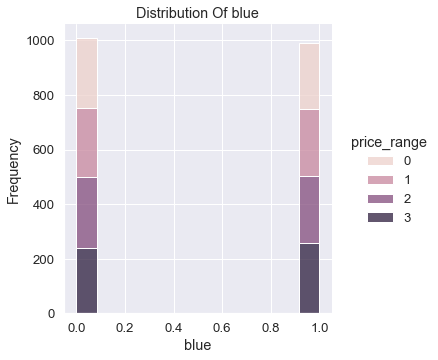

<Figure size 864x864 with 0 Axes>

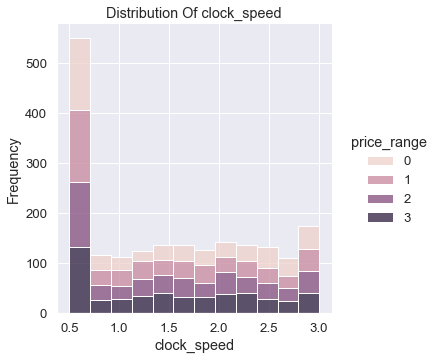

<Figure size 864x864 with 0 Axes>

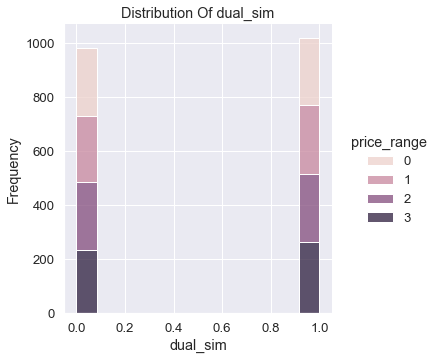

<Figure size 864x864 with 0 Axes>

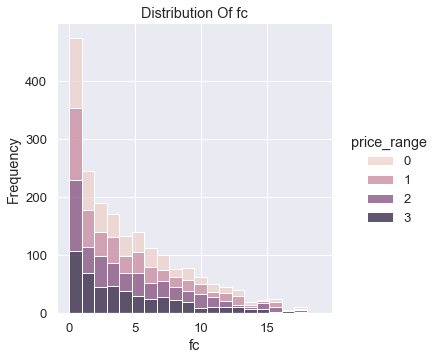

<Figure size 864x864 with 0 Axes>

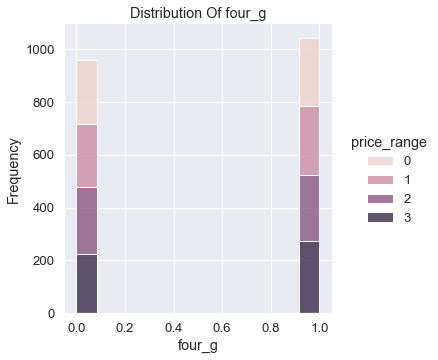

<Figure size 864x864 with 0 Axes>

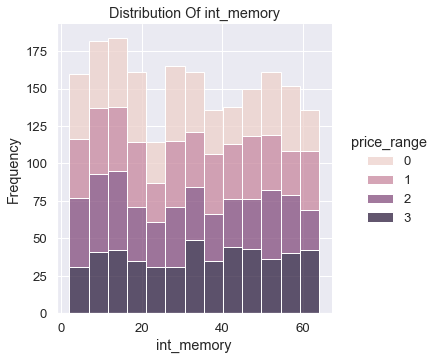

<Figure size 864x864 with 0 Axes>

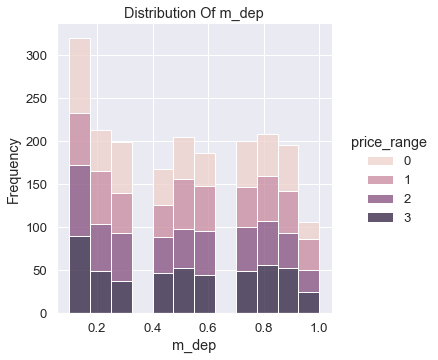

<Figure size 864x864 with 0 Axes>

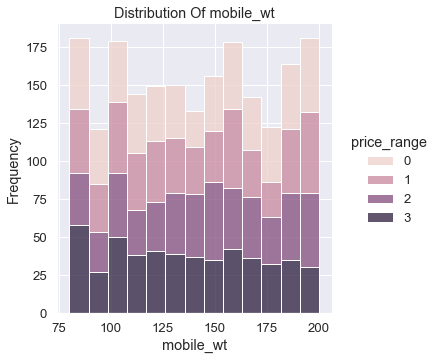

<Figure size 864x864 with 0 Axes>

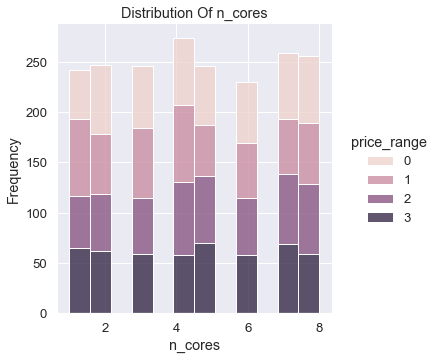

<Figure size 864x864 with 0 Axes>

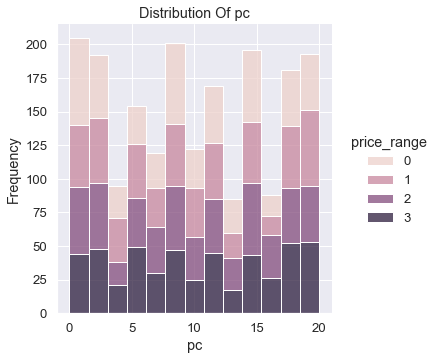

<Figure size 864x864 with 0 Axes>

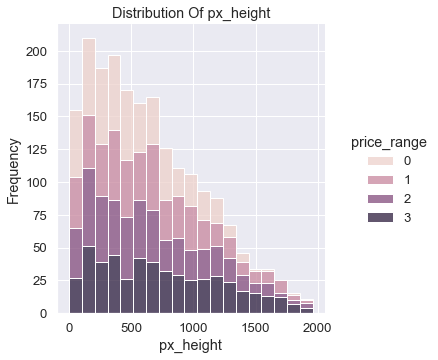

<Figure size 864x864 with 0 Axes>

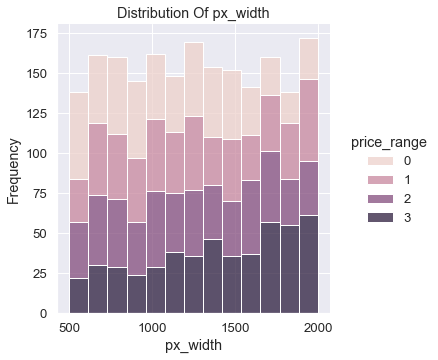

<Figure size 864x864 with 0 Axes>

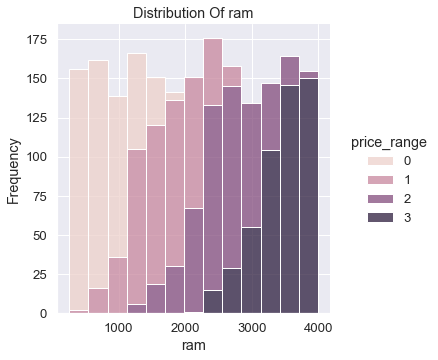

<Figure size 864x864 with 0 Axes>

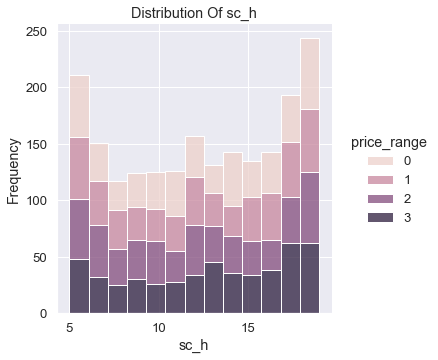

<Figure size 864x864 with 0 Axes>

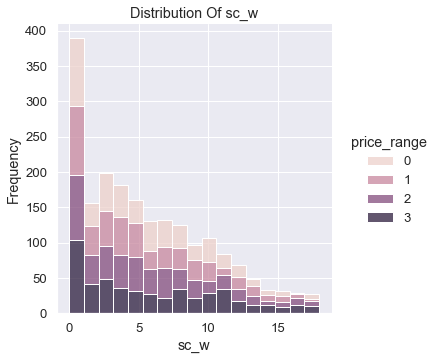

<Figure size 864x864 with 0 Axes>

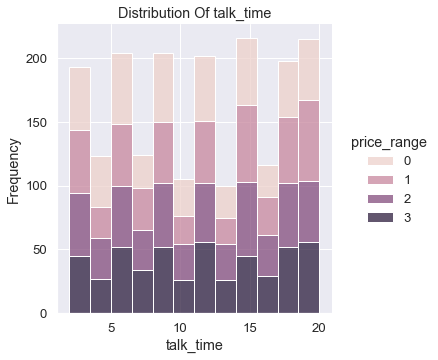

<Figure size 864x864 with 0 Axes>

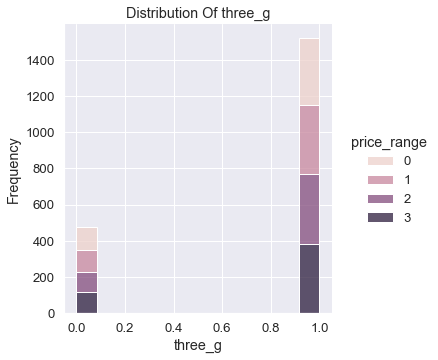

<Figure size 864x864 with 0 Axes>

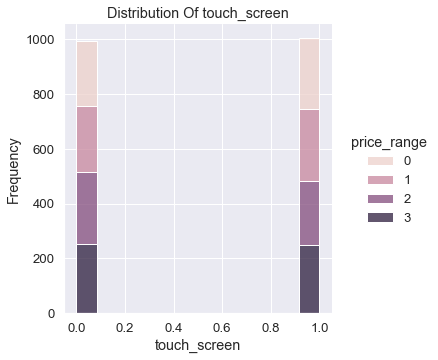

<Figure size 864x864 with 0 Axes>

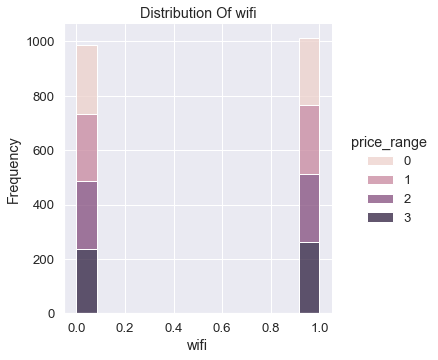

<Figure size 864x864 with 0 Axes>

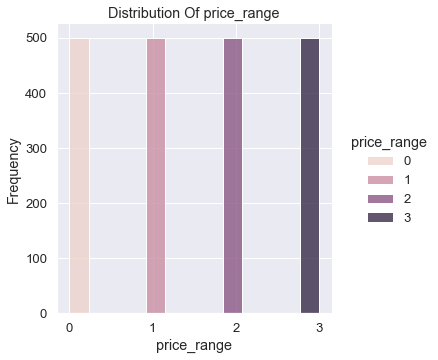

In [36]:
for col in columns:
    plot_features_for_each_class(col)

#### Notes
prefectly balanced data are:

    - price range (0, 1, 2, 3)
    - Wifi (0, 1)
    - Touch Screen (0, 1)
    - blue (0 ,1)
    - dual sim (0, 1)

<a id='datasplit'></a>

## Data Split

In [37]:
x = train_data.drop(["price_range"],axis=1)
y = train_data["price_range"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

<a id='datascaling'></a>

# Data scaling

In [38]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<a id='MS'></a>

## Modeling - base model

In [39]:
Models = {
    "Logestic Regression":LogisticRegression(),
    "support Vector Classifier":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbour":KMeans(),
    "XGBboost":XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Bagging Boost":BaggingClassifier()
}
    #"AgglomerativeClustering": AgglomerativeClustering(),


In [40]:
for name, model in Models.items() :
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ## score 
    print('Train Score: ', r2_score(y_train, model.predict(x_train))*100)
    print('Validation Score: ', r2_score(y_test, y_pred)*100)
    print("Recall Score: ", recall_score(y_test, y_pred,average="macro")*100)
    print("Precision Score: ",precision_score(y_test, y_pred,average="macro")* 100)
    print("_"*50)
    
print('Finished')

Logestic Regression
Train Score:  98.20321400095578
Validation Score:  96.76316481560154
Recall Score:  96.09225458025705
Precision Score:  95.98980936837268
__________________________________________________
support Vector Classifier
Train Score:  98.95187483389087
Validation Score:  89.68258784972993
Recall Score:  87.26885083401696
Precision Score:  87.83611821832316
__________________________________________________
Decision Tree
Train Score:  100.0
Validation Score:  88.0641702575307
Recall Score:  85.46708367514357
Precision Score:  85.52777309066805
__________________________________________________
Random Forest
Train Score:  100.0
Validation Score:  89.07568125265522
Recall Score:  86.70486395952967
Precision Score:  86.80718519677374
__________________________________________________
K-Nearest Neighbour
Train Score:  -607.434576401462
Validation Score:  -536.8473225303959
Recall Score:  6.30148516543615
Precision Score:  11.60196043591566
_____________________________________

C:\Users\Cannonball\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cannonball\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train Score:  100.0
Validation Score:  91.09870324290425
Recall Score:  89.06719989062071
Precision Score:  89.54930961631517
__________________________________________________
AdaBoost
Train Score:  75.19437106875077
Validation Score:  74.50992292286217
Recall Score:  67.65343006562756
Precision Score:  73.72824597696456
__________________________________________________
Bagging Boost
Train Score:  99.55080350023894
Validation Score:  90.08719224777974
Recall Score:  87.93324446267434
Precision Score:  88.12483338763663
__________________________________________________
Finished


<a id='BM'></a>

## SVM - base model

it seems like that SVM is the model with highest possible accuracy score, recall, precision score

“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).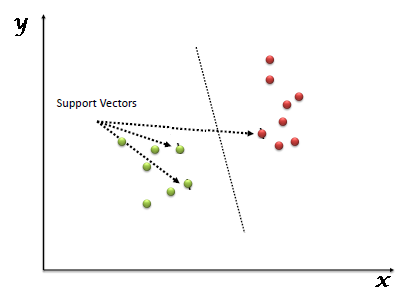

In [41]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
    
## score 
print('Train Score: ', r2_score(y_train, model.predict(x_train))*100)
print('Validation Score: ', r2_score(y_test, y_pred)*100)
print("Recall Score: ", recall_score(y_test, y_pred,average="macro")*100)
print("Precision Score: ",precision_score(y_test, y_pred,average="macro")* 100)

Train Score:  99.55080350023894
Validation Score:  89.68258784972993
Recall Score:  87.26885083401696
Precision Score:  87.83611821832316


<a id='HPT'></a>

## SVM - Hyper paramter tuning

we can further imporve our model accuracy by trying out different paramaters to our model.

In [42]:
params = {'C' : [0.09, 0.5, 0.1, 1, 5, 10], 'kernel' : ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(svm_model, param_grid = params, scoring = 'accuracy', cv = 5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.09, 0.5, 0.1, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

here we can find the best paramters with highest scoring accuracy

In [43]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

<a id='finalmodel'></a>

## Build our final model

In [44]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
    
## score 
print('Train Score: ', r2_score(y_train, model.predict(x_train))*100)
print('Validation Score: ', r2_score(y_test, y_pred)*100)
print("Recall Score: ", recall_score(y_test, y_pred,average="macro")*100)
print("Precision Score: ",precision_score(y_test, y_pred,average="macro")* 100)

Train Score:  99.55080350023894
Validation Score:  96.56086261657664
Recall Score:  95.8185927672956
Precision Score:  95.78616878329312


<AxesSubplot:>

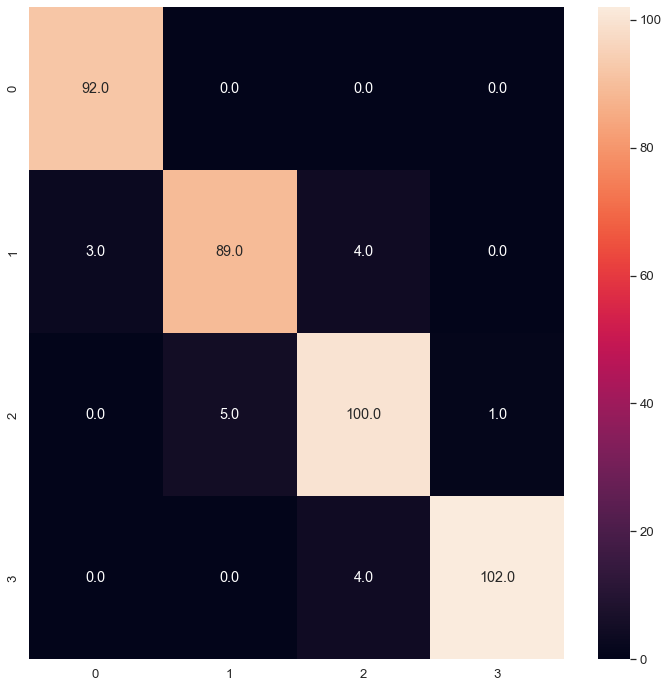

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))

sns.heatmap(cm, annot = True, fmt = '.1f' )

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [47]:
# let's test our model and predict the first row
# the answer should be 1
data = train_data.iloc[0][:-1].array
data

<PandasArray>
[ 842.0,    0.0,    2.2,    0.0,    1.0,    0.0,    7.0,    0.6,  188.0,
    2.0,    2.0,   20.0,  756.0, 2549.0,    9.0,    7.0,   19.0,    0.0,
    0.0,    1.0]
Length: 20, dtype: float64

In [48]:
# and it's 1 as predicted
model.predict([data])[0]

3

In [49]:
import joblib
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

## The end